In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Import necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Products_Information.zip")

In [4]:
data.nunique()

id               3000888
date                1684
store_nbr             54
product_type          33
sales             379610
special_offer        362
dtype: int64

In [5]:
data

id        date  store_nbr                product_type     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         special_offer  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
3000883              0  
3000884              1  
3000885            148  
3000886              8  
3000887              0  

[3000888 rows x 6 columns]

In [6]:
data.isnull().sum()

id               0
date             0
store_nbr        0
product_type     0
sales            0
special_offer    0
dtype: int64

In [7]:
data['date'] = pd.to_datetime(data['date'])
data.index = data['date']
data = data.rename_axis('index_date')

In [8]:
data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  
index_date                           
2013-01-01     0.000              0  
2013-01-01     0.000              0  
2013-01-01     0.000              0  
2013-01-01     0.000              0  
2013-01-01     0.000              0  
...              ...            ...  
2017-08-15   438.133              0  
2017-08-15   154.553              1  
2017-08-15  2419.729            148  
2017-08-15   121.000              8  
2017-08-15    16.000              0  

[3000888 rows x 6 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int64         
 1   date           datetime64[ns]
 2   store_nbr      int64         
 3   product_type   object        
 4   sales          float64       
 5   special_offer  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 160.3+ MB


In [10]:
data.describe()

id     store_nbr         sales  special_offer
count  3.000888e+06  3.000888e+06  3.000888e+06   3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02   2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03   1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00   0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00   0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01   0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02   0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05   7.410000e+02

In [11]:
unique_dates = data.index.nunique()
print("Working on dataset from past %s days" % unique_dates)

Working on dataset from past 1684 days


## EDA

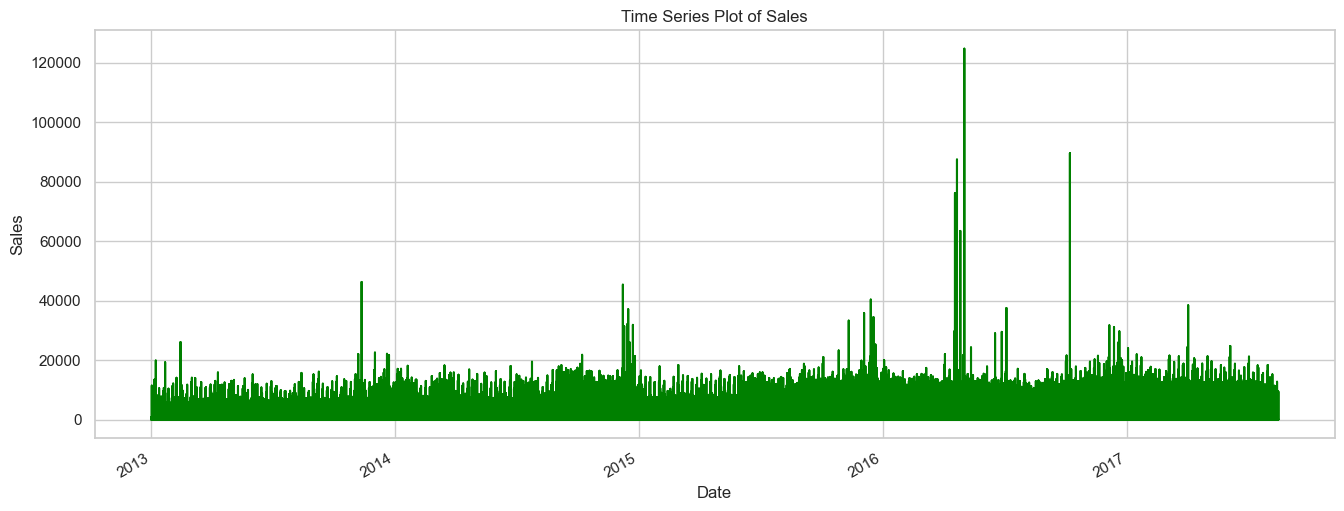

In [333]:
# Time Series Plot for sales
plt.figure(figsize=(16, 6))
data['sales'].plot(color='green')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

KeyboardInterrupt: 

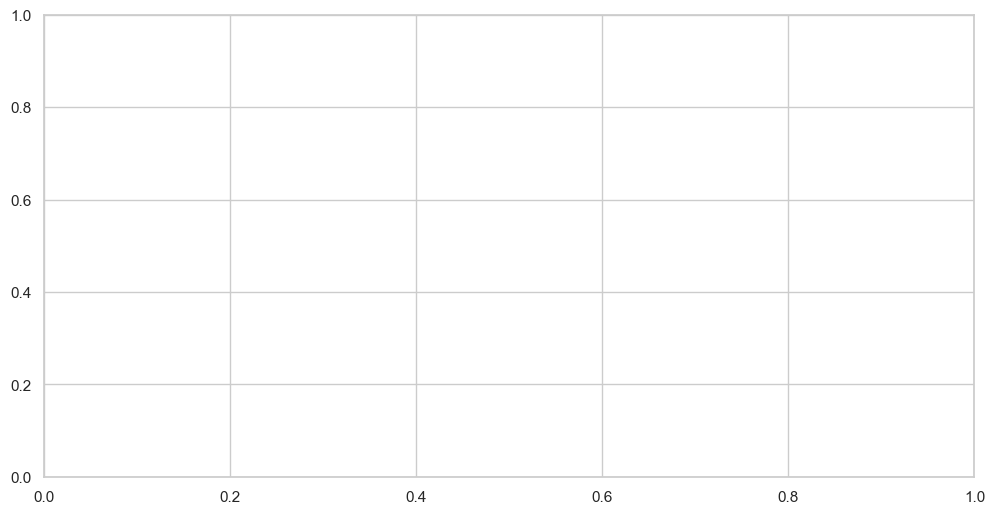

In [334]:
# Numerical Features
numerical_features = ['sales', 'special_offer']

# Histograms for Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot for Numerical Features
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[feature], color='lightcoral')
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Categorical Features
categorical_features = ['store_nbr', 'product_type']

# Bar Plots for Categorical Features
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=data[feature], palette='viridis')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

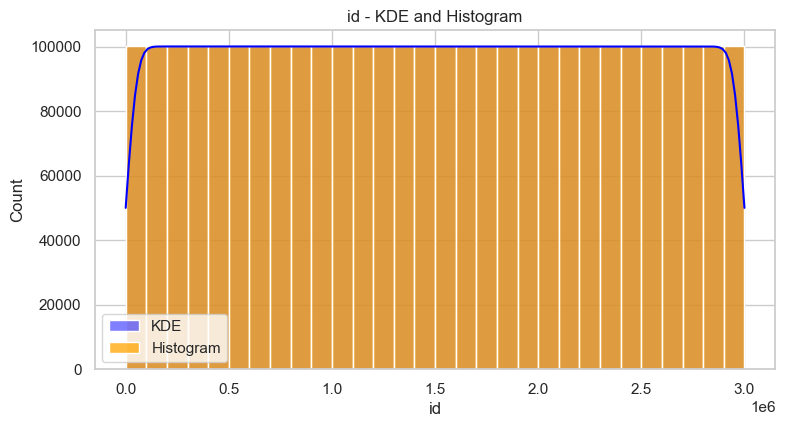

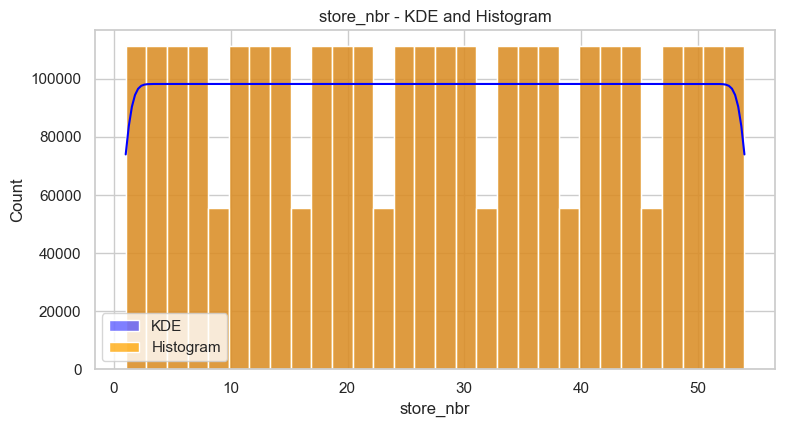

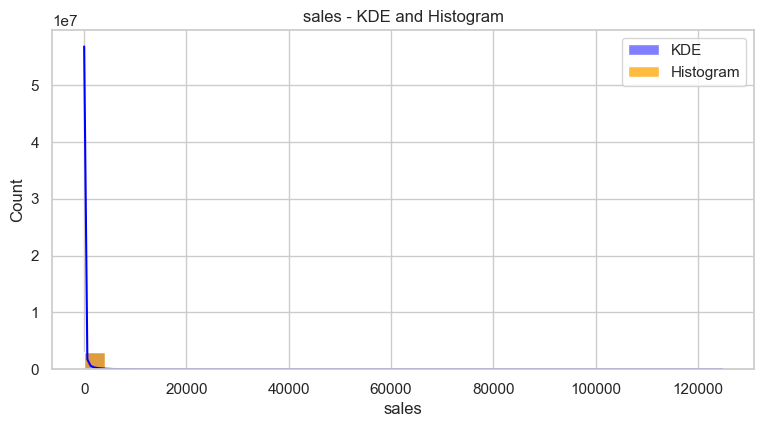

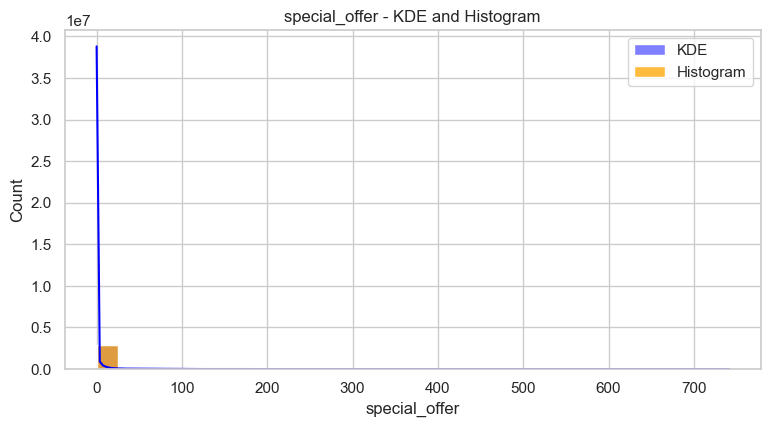

In [580]:
for feature in data.select_dtypes(include=['float', 'int']).columns:
    plt.figure(figsize=(15, 8))

    # KDE and Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(data[feature], kde=True, bins=30, color='blue', label='KDE')
    sns.histplot(data[feature], kde=False, bins=30, color='orange', label='Histogram')
    plt.title(f'{feature} - KDE and Histogram')
    plt.legend()

    plt.tight_layout()
    plt.show()

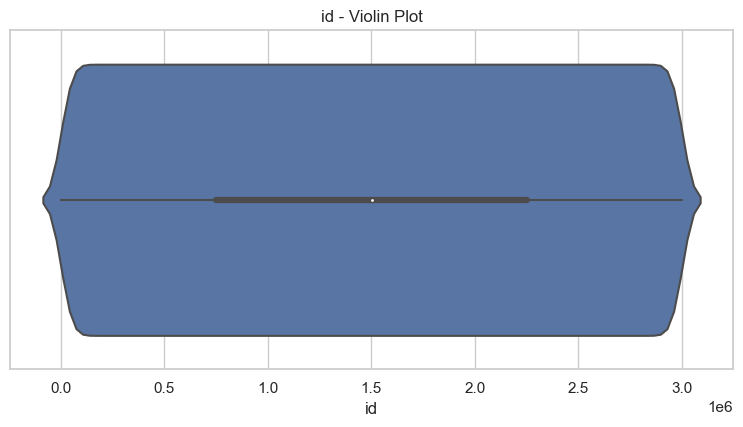

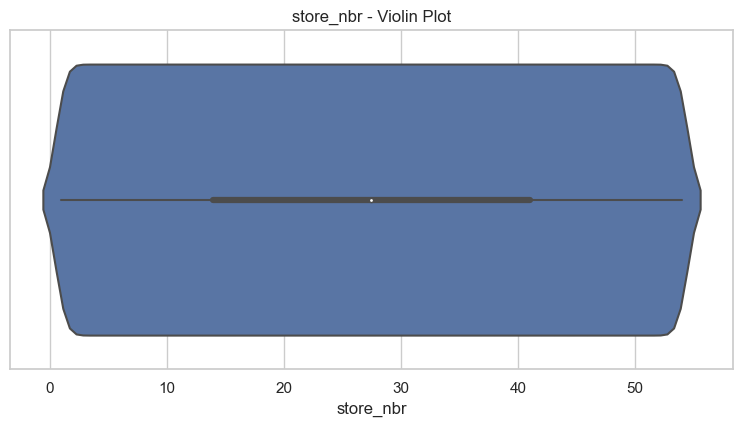

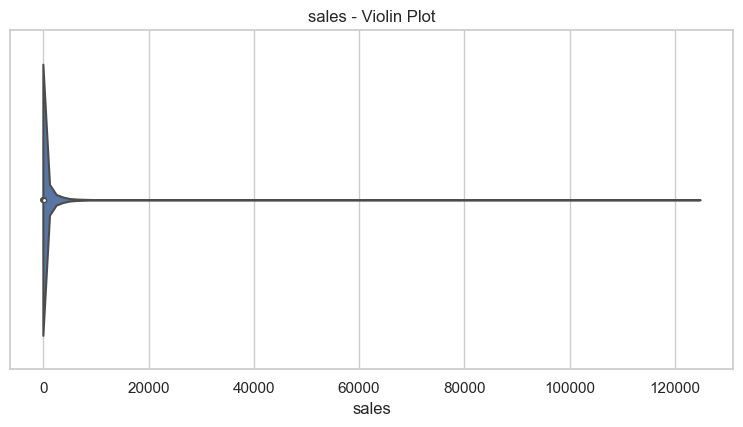

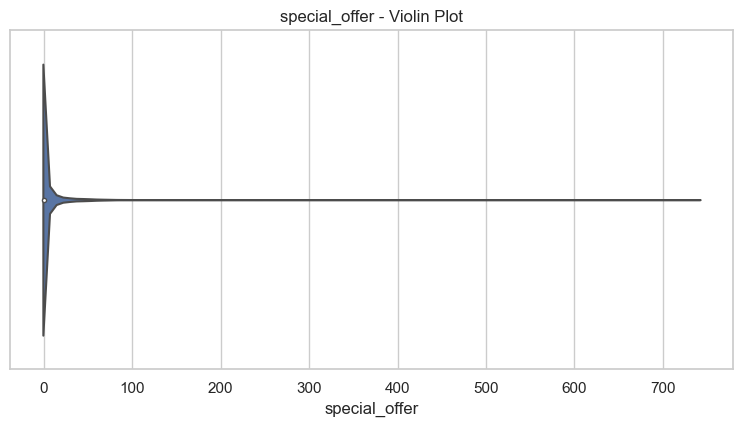

In [581]:
for feature in data.select_dtypes(include=['float', 'int']).columns:
    plt.figure(figsize=(15, 8))

    # Violin plot
    plt.subplot(2, 2, 2)
    sns.violinplot(x=data[feature])
    plt.title(f'{feature} - Violin Plot')

    plt.tight_layout()
    plt.show()

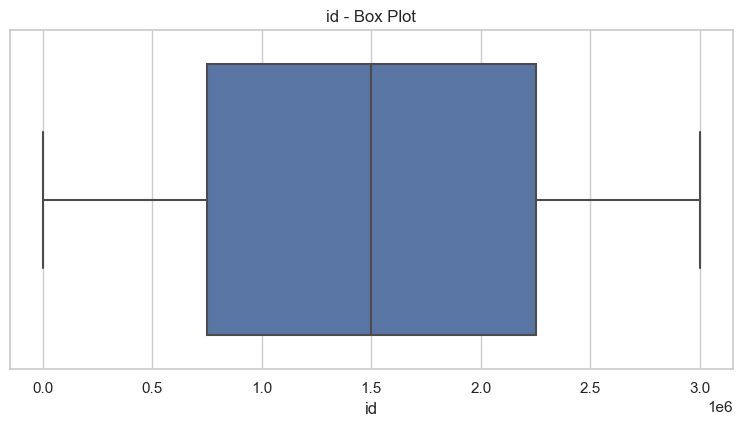

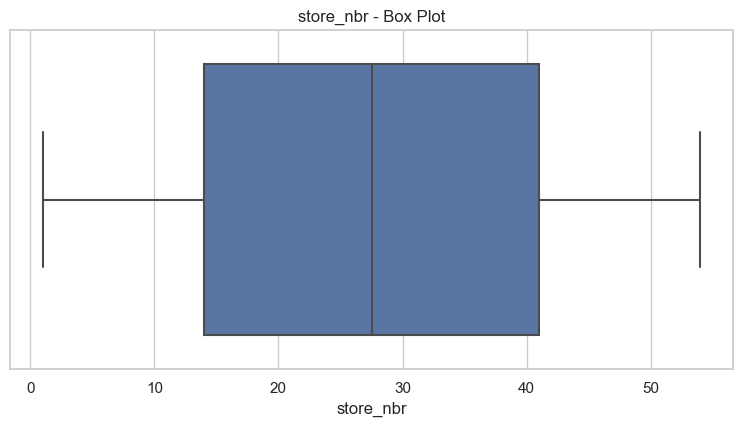

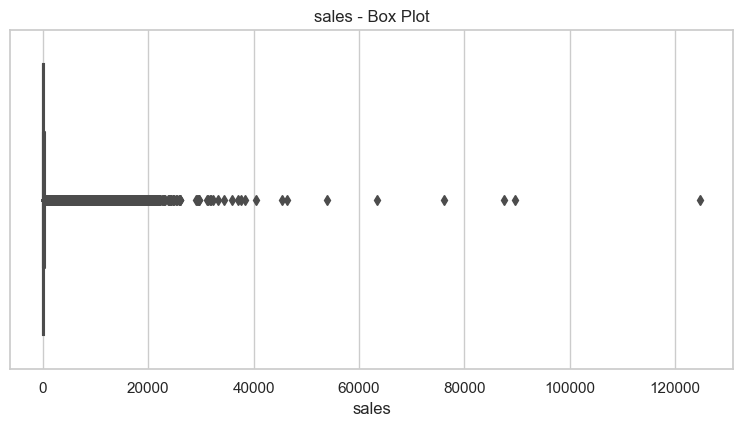

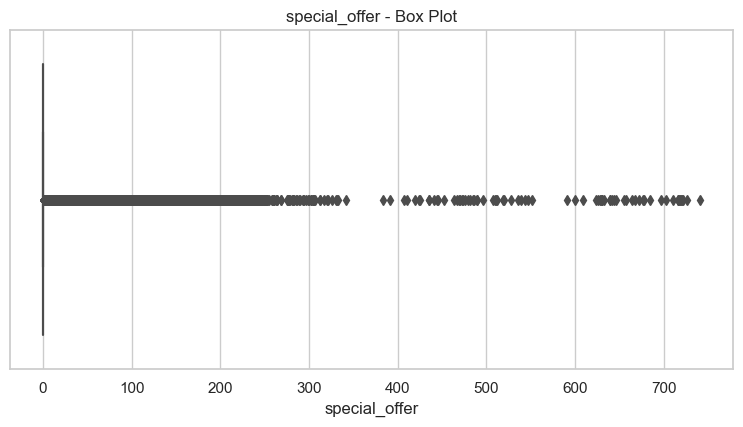

In [582]:
for feature in data.select_dtypes(include=['float', 'int']).columns:
    plt.figure(figsize=(15, 8))

    # Box plot
    plt.subplot(2, 2, 3)
    sns.boxplot(x=data[feature])
    plt.title(f'{feature} - Box Plot')

    plt.tight_layout()
    plt.show()

In [ ]:
# Create a pairplot 
#sns.pairplot(data,hue='sales',diag_kind='kde')
#plt.show()

In [ ]:
#data.corr(method='pearson')

## Data Wrangling

In [30]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek + 1  # Adding 1 to start the week from Monday (1) to Sunday (7)
data['is_weekend'] = (data['date'].dt.weekday // 5 ==1).astype(int)

data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  is_weekend  
index_date                                                                      
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
...              ...            ...   ...    ...  ...          ...         ...  
2017-08-15   438.133              0  2017      8   15            2           0  
2017-08-15   154.553              1  2017      8   15            2           0  
2017-08-15  2419.729            148  2017      8   15            2           0  
2017-08-15   121.000              8  2017      8   15            2           0  
2017-08-15    16.000              0  2017      8   15            2           0  

[3000888 rows x 11 columns]

In [13]:
data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  is_weekend  
index_date                                                                      
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
...              ...            ...   ...    ...  ...          ...         ...  
2017-08-15   438.133              0  2017      8   15            2           0  
2017-08-15   154.553              1  2017      8   15            2           0  
2017-08-15  2419.729            148  2017      8   15            2           0  
2017-08-15   121.000              8  2017      8   15            2           0  
2017-08-15    16.000              0  2017      8   15            2           0  

[3000888 rows x 11 columns]

## Bivariate EDA

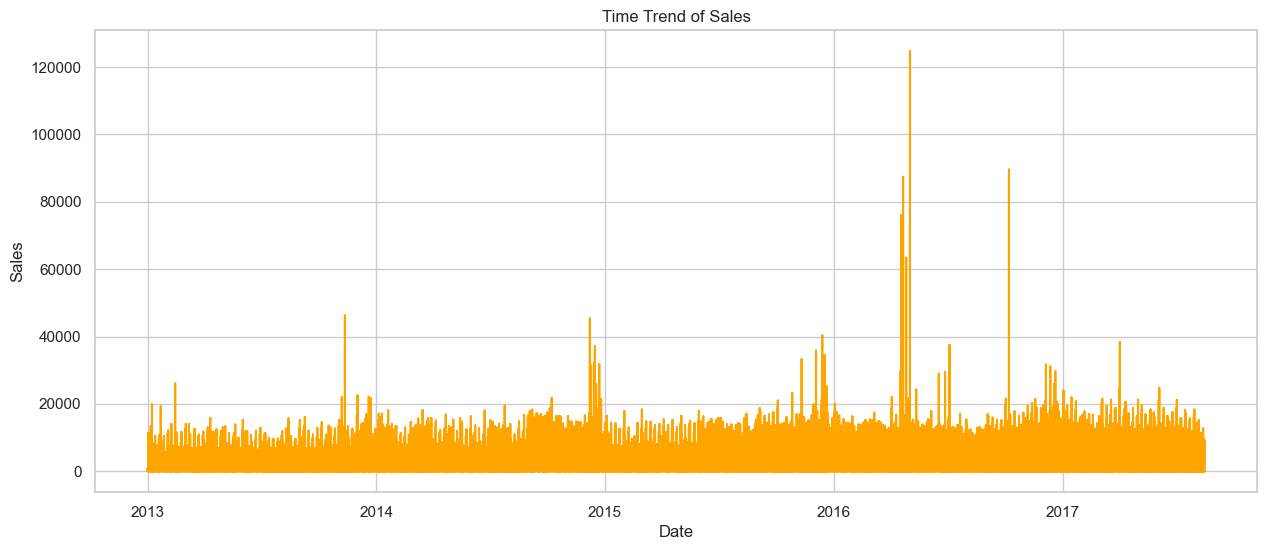

In [14]:
# Time trend of sales
plt.figure(figsize=(15, 6))
plt.plot(data['sales'], color='orange')
plt.title('Time Trend of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

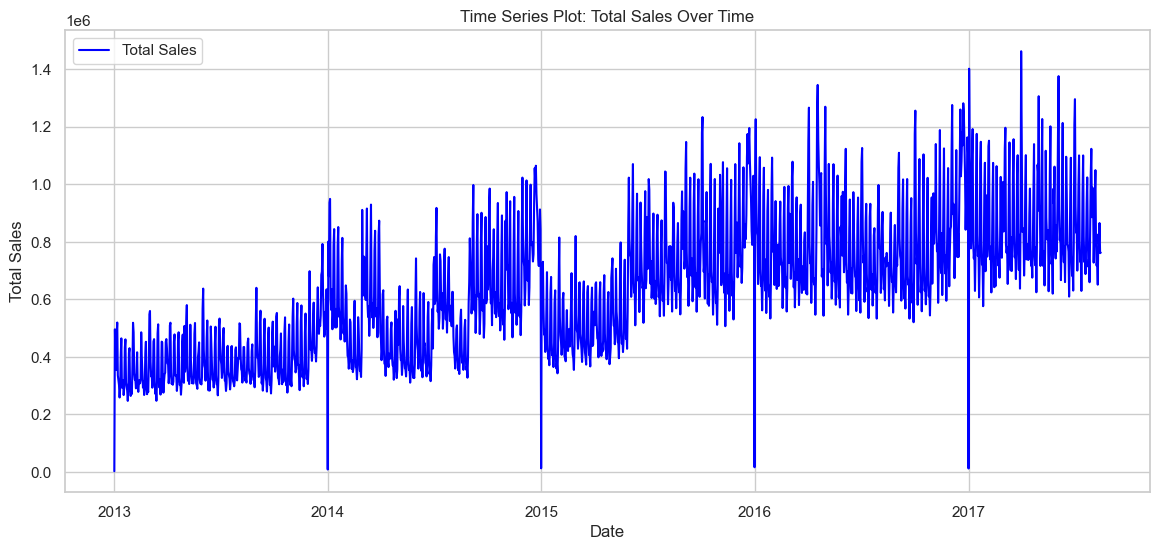

date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-08-11    826373.722022
2017-08-12    792630.535079
2017-08-13    865639.677471
2017-08-14    760922.406081
2017-08-15    762661.935939
Name: sales, Length: 1684, dtype: float64

In [15]:
# Aggregate sales by date
daily_sales = data.groupby('date')['sales'].sum()

# Time series plot
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Total Sales', color='blue')
plt.title('Time Series Plot: Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()
daily_sales

In [16]:
# Aggregate sales by product type
product_sales = data.groupby('product_type')['sales'].sum().reset_index()
product_sales.head(15)

product_type         sales
0     AUTOMOTIVE  5.548220e+05
1      BABY CARE  1.005100e+04
2         BEAUTY  3.378930e+05
3      BEVERAGES  2.169545e+08
4          BOOKS  6.438000e+03
5   BREAD/BAKERY  4.213395e+07
6    CELEBRATION  7.611770e+05
7       CLEANING  9.752129e+07
8          DAIRY  6.448771e+07
9           DELI  2.411032e+07
10          EGGS  1.558830e+07
11  FROZEN FOODS  1.407389e+07
12     GROCERY I  3.434627e+08
13    GROCERY II  1.962767e+06
14      HARDWARE  1.034700e+05

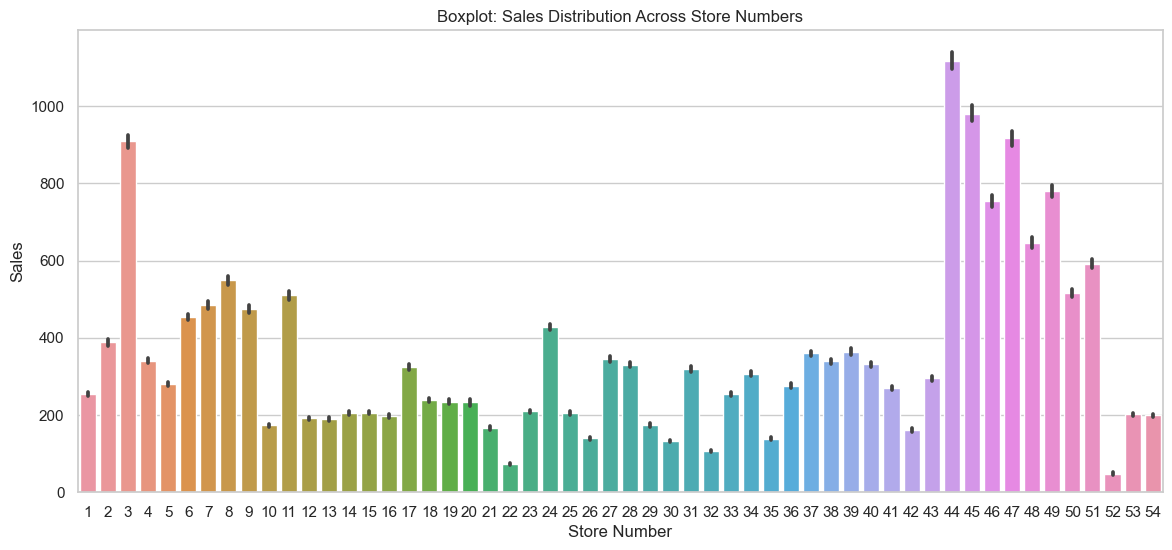

In [17]:
# sales by store number
plt.figure(figsize=(14, 6))
sns.barplot(x='store_nbr', y='sales', data=data)
plt.title('Boxplot: Sales Distribution Across Store Numbers')
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.show()

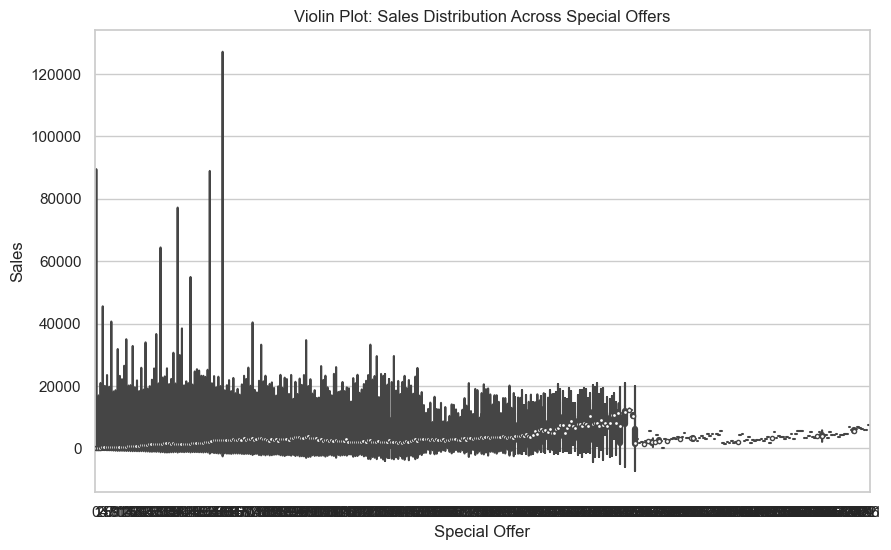

In [18]:
# sales by special offer
plt.figure(figsize=(10, 6))
sns.violinplot(x='special_offer', y='sales', data=data)
plt.title('Violin Plot: Sales Distribution Across Special Offers')
plt.xlabel('Special Offer')
plt.ylabel('Sales')
plt.show()

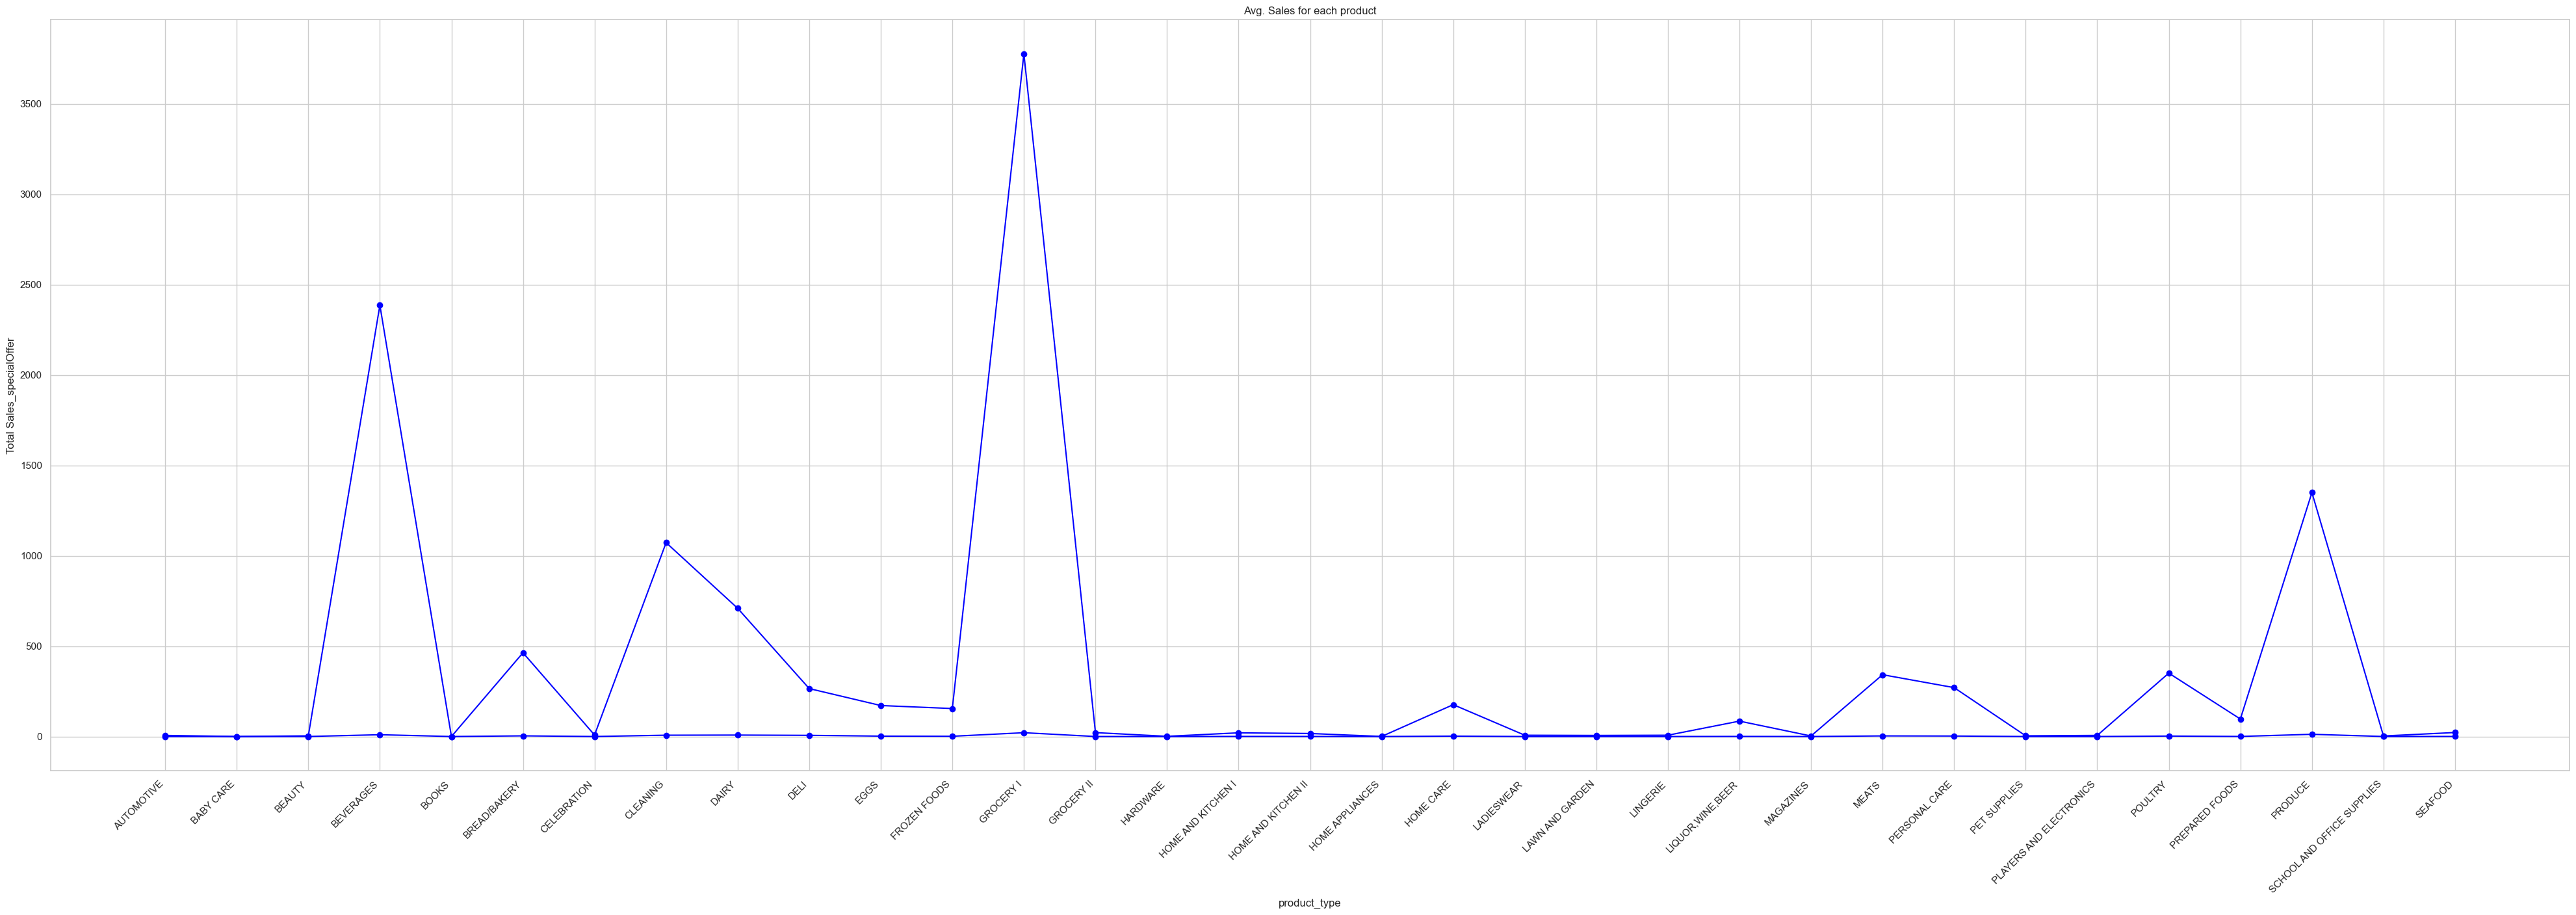

In [19]:
grouped_sales_special_offer = data.groupby('product_type')[['sales', 'special_offer']].mean()
plt.figure(figsize=(50, 15))
plt.plot(grouped_sales_special_offer.index, grouped_sales_special_offer.values, label='Total Sales', color='blue', marker='o',linestyle='-')
plt.title("Avg. Sales for each product")
plt.xlabel('product_type')
plt.ylabel('Total Sales_specialOffer')
plt.xticks(rotation=45, ha="right")
plt.show()

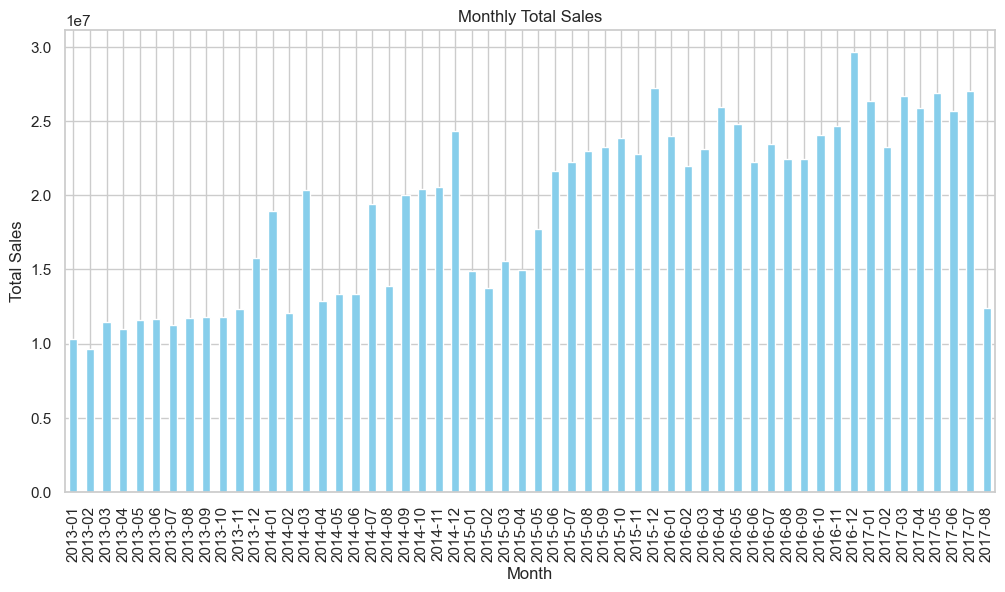

In [20]:
# Monthly Sales Analysis
monthly_sales = data.groupby(data.index.to_period("M")).agg({"sales": "sum"})
monthly_sales.plot(kind="bar", figsize=(12, 6), color='skyblue', legend=False)
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

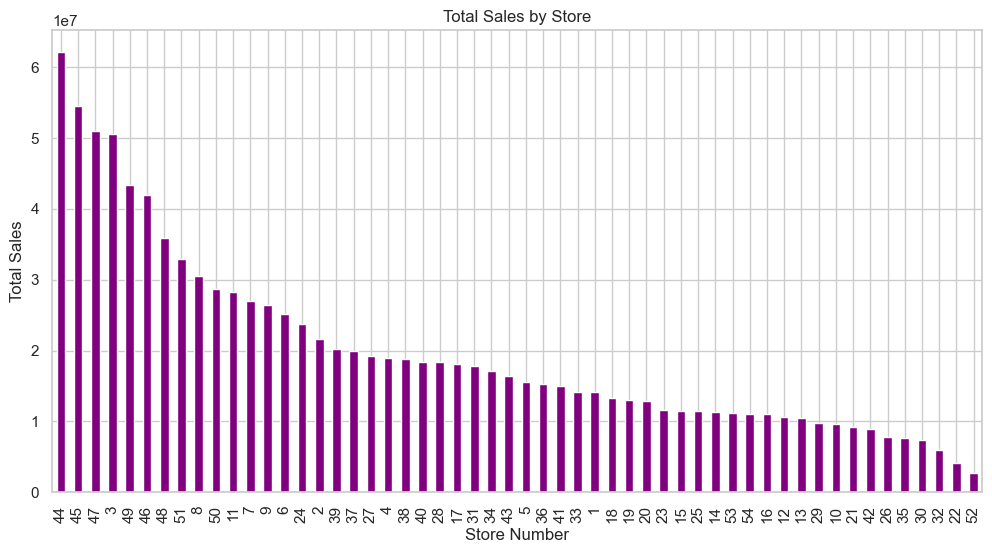

In [21]:
# Store-wise Sales Analysis
store_wise_sales = data.groupby('store_nbr')['sales'].sum().sort_values(ascending=False)
store_wise_sales.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Total Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
data

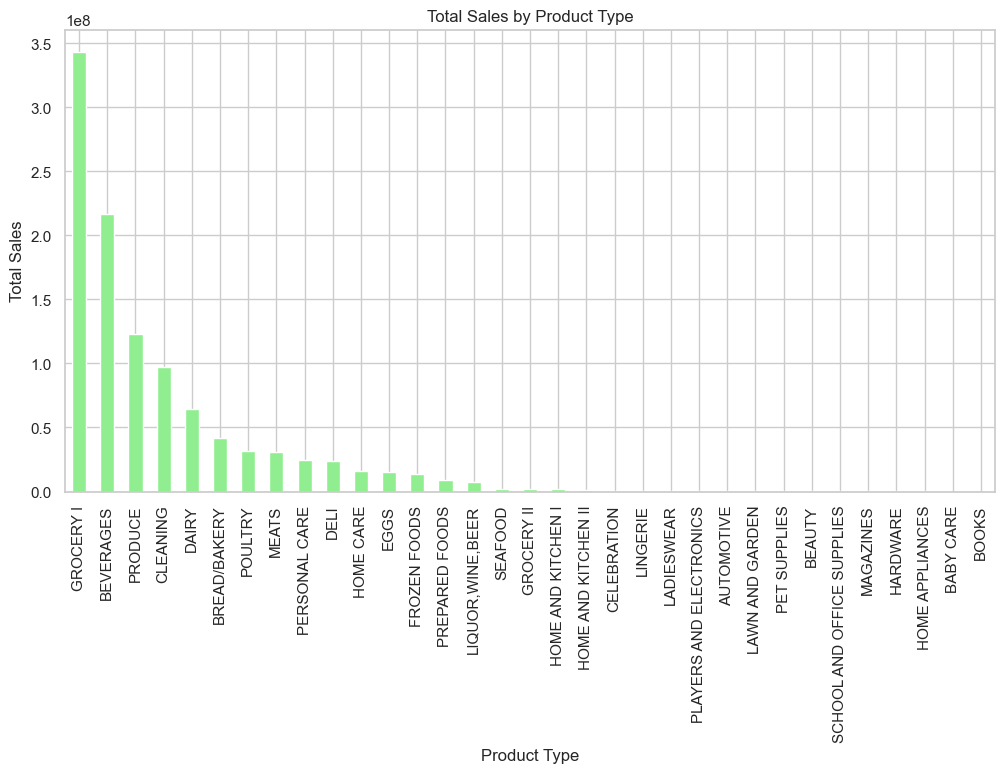

In [22]:
# Product-wise Sales Analysis
product_wise_sales = data.groupby('product_type')['sales'].sum().sort_values(ascending=False)
product_wise_sales.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.show()


In [23]:
data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  is_weekend  
index_date                                                                      
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
...              ...            ...   ...    ...  ...          ...         ...  
2017-08-15   438.133              0  2017      8   15            2           0  
2017-08-15   154.553              1  2017      8   15            2           0  
2017-08-15  2419.729            148  2017      8   15            2           0  
2017-08-15   121.000              8  2017      8   15            2           0  
2017-08-15    16.000              0  2017      8   15            2           0  

[3000888 rows x 11 columns]

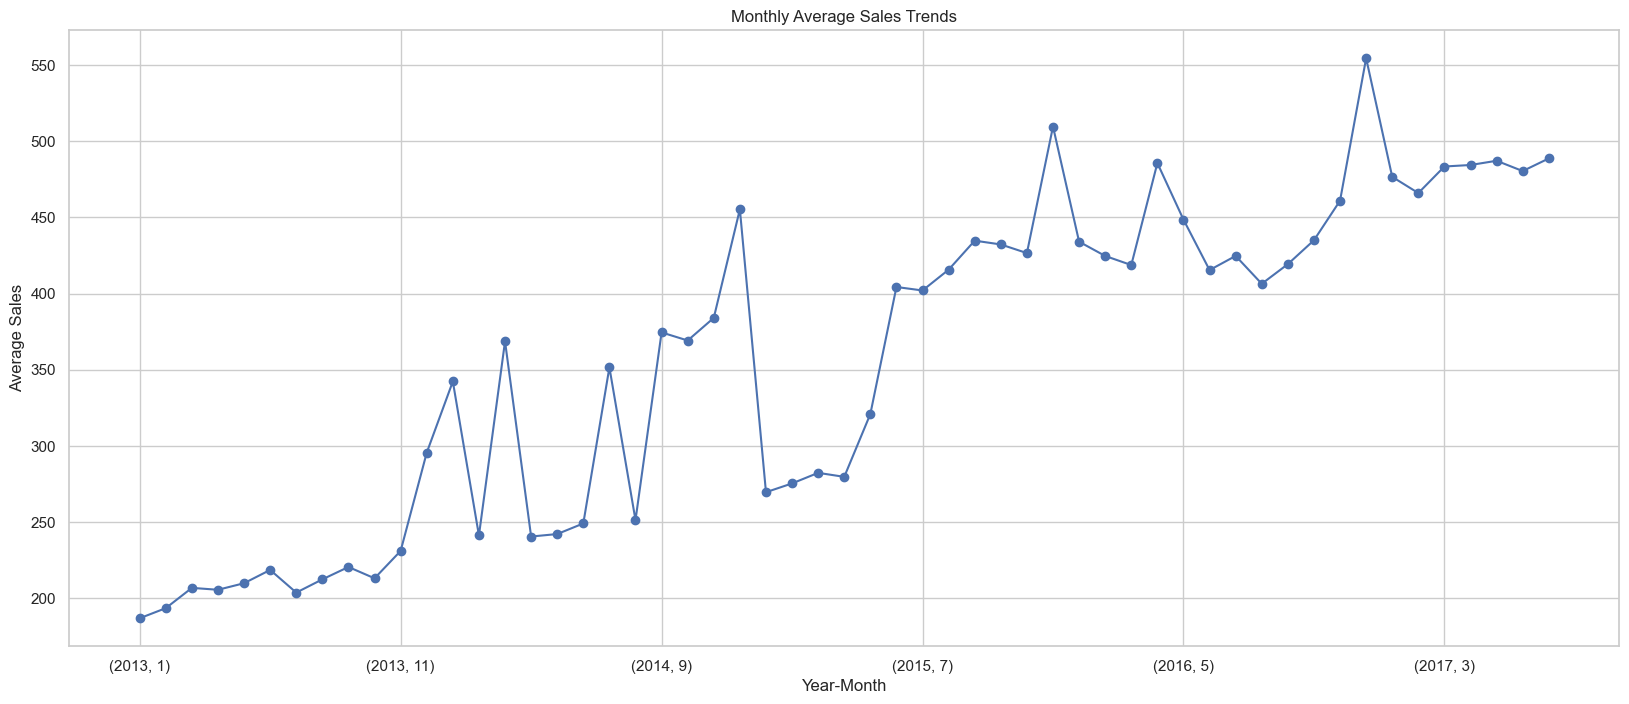

In [567]:
# Monthly Sales Trends
monthly_sales_trends = data.groupby(['year', 'month'])['sales'].mean()
monthly_sales_trends.plot(figsize=(20, 8), marker='o')
plt.title('Monthly Average Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Average Sales')

plt.show()

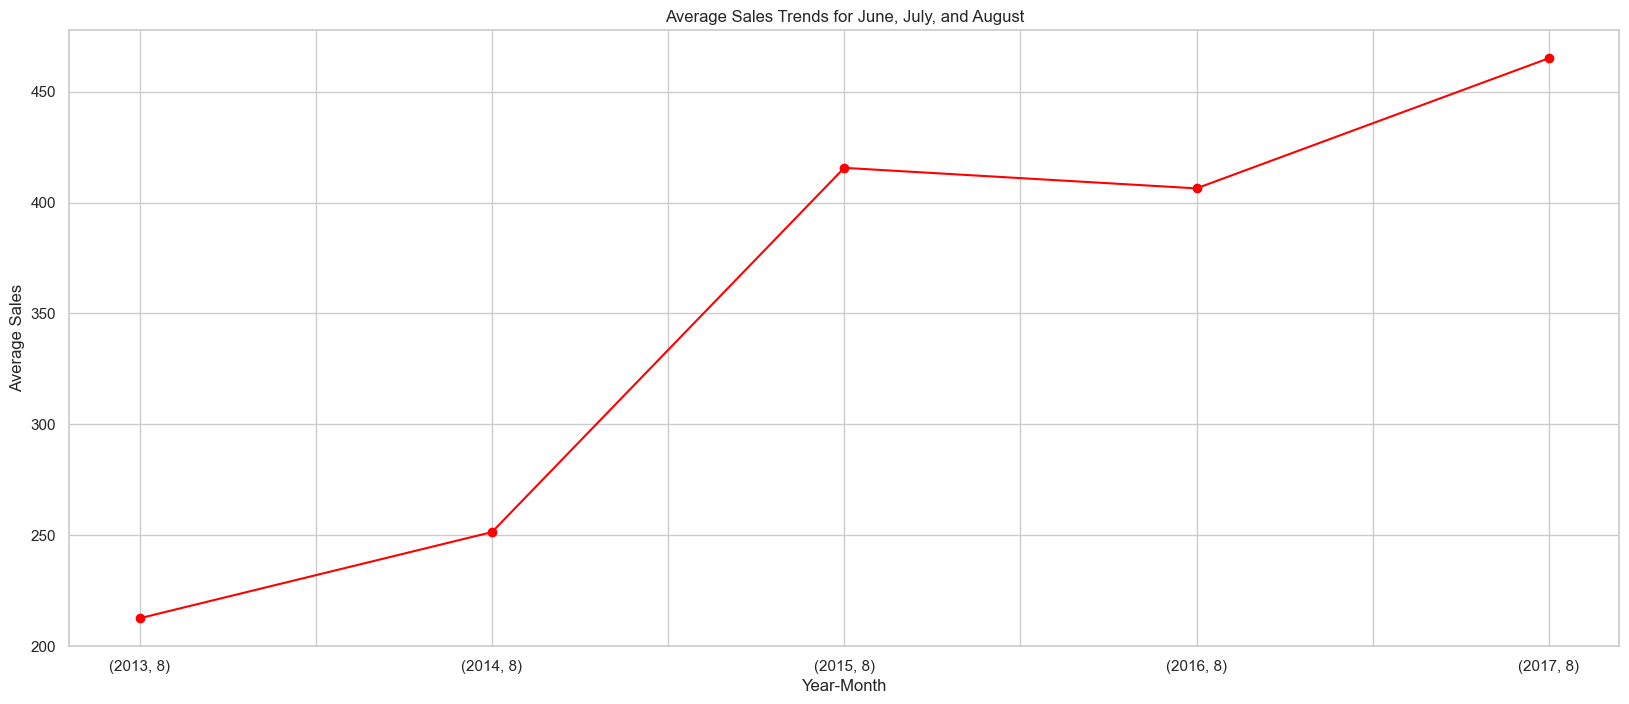

In [24]:
# Filter data for June, July, and August
summer_months_data = data[data['month'].isin([8])]

# Monthly Sales Trends for June, July, and August
summer_monthly_sales_trends = summer_months_data.groupby(['year', 'month'])['sales'].mean()
summer_monthly_sales_trends.plot(figsize=(20, 8), marker='o', color='red')
plt.title('Average Sales Trends for June, July, and August')
plt.xlabel('Year-Month')
plt.ylabel('Average Sales')
plt.show()

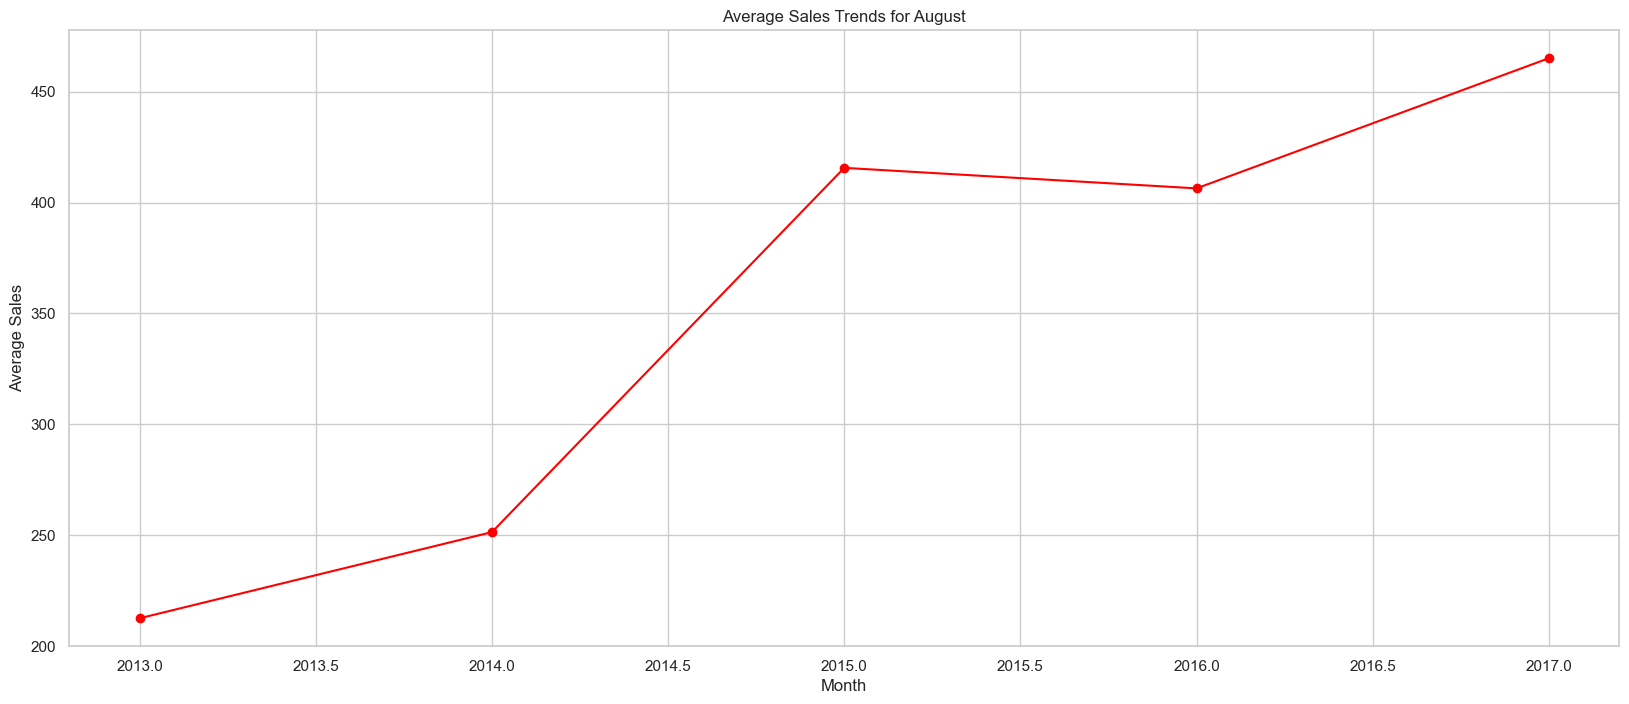

In [25]:
# Monthly Sales Trends for August
august_sales_trends = summer_months_data[summer_months_data['month'] == 8].groupby('year')['sales'].mean()

# Plot the trends for August
plt.figure(figsize=(20, 8))
plt.plot(august_sales_trends.index, august_sales_trends.values, marker='o', color='red')
plt.title('Average Sales Trends for August')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

In [26]:
data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  is_weekend  
index_date                                                                      
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
2013-01-01     0.000              0  2013      1    1            2           0  
...              ...            ...   ...    ...  ...          ...         ...  
2017-08-15   438.133              0  2017      8   15            2           0  
2017-08-15   154.553              1  2017      8   15            2           0  
2017-08-15  2419.729            148  2017      8   15            2           0  
2017-08-15   121.000              8  2017      8   15            2           0  
2017-08-15    16.000              0  2017      8   15            2           0  

[3000888 rows x 11 columns]

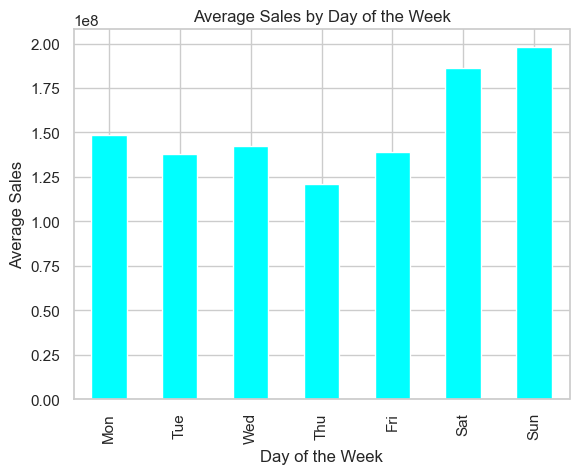

In [27]:
# Day of the Week Sales Analysis
day_of_week_sales = data.groupby('day_of_week')['sales'].sum()
day_of_week_sales.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_of_week_sales.plot(kind='bar', color='cyan')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()

In [28]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame
offer_impact = data.groupby('special_offer')['sales'].mean().reset_index()

# Plotting with Plotly Express
fig = px.bar(offer_impact, x='special_offer', y='sales', title='Impact of Special Offers on Sales',
             labels={'special_offer': 'Special Offer Intensity', 'sales': 'Average Sales'})
fig.update_layout(xaxis_title='Special Offer Intensity', yaxis_title='Average Sales', xaxis=dict(tickangle=0))
fig.show()

In [29]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame
offer_impact = data.groupby('special_offer')['sales'].mean().reset_index()

# Plotting with Plotly Express
fig = px.bar(offer_impact, x='special_offer', y='sales', title='Impact of Special Offers on Sales',
             labels={'special_offer': 'Special Offer Intensity', 'sales': 'Average Sales'})
fig.update_layout(xaxis_title='Special Offer Intensity', yaxis_title='Average Sales', xaxis=dict(tickangle=0))
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Replace 'product_type' with the actual column name if needed
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Visualization: Bar plot for the distribution of special offers
sns.countplot(x='special_offer', data=data, palette='viridis')
plt.title('Distribution of Special Offers')
plt.xlabel('Special Offer')
plt.ylabel('Count')

# Statistical Summary: Frequency and Proportion
special_offer_counts = data['special_offer'].value_counts()
special_offer_proportions = special_offer_counts / len(data)

print("Special Offer Counts:")
print(special_offer_counts)
print("\nSpecial Offer Proportions:")
print(special_offer_proportions)

# Correlation Analysis: Example assuming 'sales' is the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='special_offer', y='sales', data=data, palette='viridis')
plt.title('Impact of Special Offers on Sales')
plt.xlabel('Special Offer')
plt.ylabel('Sales')

plt.show()


In [ ]:
# Impact of Special Offers on Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='special_offer', y='sales', data=data, palette='viridis')
plt.title('Impact of Special Offers on Sales')
plt.xlabel('Special Offer')
plt.ylabel('Sales')
plt.show()

## One-hot-Encoding

In [ ]:
# One-hot encoding for 'product_type'
#data_encoded = pd.get_dummies(data, columns=['product_type'], drop_first=True)
#data_encoded

## Feature Engineering

In [ ]:
# Create a rolling mean for weekly sales
#data_encoded['rolling_mean_7'] = data_encoded.groupby(['product_type', 'store_nbr'])['sales'].transform(lambda x: x.rolling(window=7).mean()).reset_index(level=0, drop=True)

# Forward fill NaN values in the rolling mean column
#data_encoded['rolling_mean_7'].fillna(method='ffill', inplace=True)

In [ ]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Get correlations with the target variable ('sales')
correlations_with_sales = corr_matrix['sales'].sort_values(ascending=False)

# Select top N features with high correlation
top_features = correlations_with_sales[1: 3+1].index.tolist()

In [ ]:
top_features

In [337]:
corr_matrix

id     store_nbr     sales  special_offer          year  \
id             1.000000  3.042213e-04  0.085895       0.206440  9.770533e-01   
store_nbr      0.000304  1.000000e+00  0.040861       0.007272  8.768486e-15   
sales          0.085895  4.086079e-02  1.000000       0.425920  8.106660e-02   
special_offer  0.206440  7.271867e-03  0.425920       1.000000  1.990082e-01   
year           0.977053  8.768486e-15  0.081067       0.199008  1.000000e+00   
month          0.059951 -4.962678e-15  0.019453       0.024774 -1.532709e-01   
day            0.017836 -2.821904e-16 -0.011267       0.004374 -1.722633e-03   
day_of_week    0.000990  2.821906e-17  0.037268      -0.002346  2.020693e-03   
is_weekend     0.001148  5.144036e-17  0.052270      -0.029375  1.213567e-03   

                      month           day   day_of_week    is_weekend  
id             5.995143e-02  1.783550e-02  9.904640e-04  1.147610e-03  
store_nbr     -4.962678e-15 -2.821904e-16  2.821906e-17  5.144036e-17  
sales          1.945265e-02 -1.126701e-02  3.726829e-02  5.226971e-02  
special_offer  2.477382e-02  4.373573e-03 -2.346035e-03 -2.937531e-02  
year          -1.532709e-01 -1.722633e-03  2.020693e-03  1.213567e-03  
month          1.000000e+00  6.546172e-03 -5.117285e-03 -4.782939e-04  
day            6.546172e-03  1.000000e+00  2.898900e-03  1.680510e-03  
day_of_week   -5.117285e-03  2.898900e-03  1.000000e+00  7.907354e-01  
is_weekend    -4.782939e-04  1.680510e-03  7.907354e-01  1.000000e+00

## Add features

In [419]:
# Create cumulative special offers by product type
data['cumulative_special_offers'] = data.groupby('product_type')['special_offer'].cumsum()

In [420]:
# Create lag features for daily sales
#data['sales_t-1'] = data.groupby(['product_type', 'store_nbr'])['sales'].shift(1)


In [421]:
# Create cumulative special offers by product type
data['cumulative_special_offers'] = data.groupby('product_type')['special_offer'].cumsum()

In [422]:
data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  \
index_date                                                           
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
...              ...            ...   ...    ...  ...          ...   
2017-08-15   438.133              0  2017      8   15            2   
2017-08-15   154.553              1  2017      8   15            2   
2017-08-15  2419.729            148  2017      8   15            2   
2017-08-15   121.000              8  2017      8   15            2   
2017-08-15    16.000              0  2017      8   15            2   

            is_weekend  cumulative_special_offers  
index_date                                         
2013-01-01           0                          0  
2013-01-01           0                          0  
2013-01-01           0                          0  
2013-01-01           0                          0  
2013-01-01           0                          0  
...                ...                        ...  
2017-08-15           0                     226421  
2017-08-15           0                      37524  
2017-08-15           0                    1117921  
2017-08-15           0                      14565  
2017-08-15           0                      39052  

[3000888 rows x 12 columns]

### Add Lag features

In [431]:
lag_values = [15,30,60,90]  # Adjust as needed

for lag in lag_values:
    data[f'sales_lag_{lag}'] = data.groupby(['store_nbr', 'product_type'])['sales'].shift(lag)

data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  \
index_date                                                           
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
...              ...            ...   ...    ...  ...          ...   
2017-08-15   438.133              0  2017      8   15            2   
2017-08-15   154.553              1  2017      8   15            2   
2017-08-15  2419.729            148  2017      8   15            2   
2017-08-15   121.000              8  2017      8   15            2   
2017-08-15    16.000              0  2017      8   15            2   

            is_weekend  cumulative_special_offers  sales_lag_15  sales_lag_30  \
index_date                                                                      
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
...                ...                        ...           ...           ...   
2017-08-15           0                     226421       470.513       571.333   
2017-08-15           0                      37524        61.940       125.960   
2017-08-15           0                    1117921      1517.552      2041.967   
2017-08-15           0                      14565        56.000         0.000   
2017-08-15           0                      39052        12.000        18.334   

            sales_lag_60  sales_lag_90  
index_date                              
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
...                  ...           ...  
2017-08-15       470.789       394.846  
2017-08-15       122.255        87.339  
2017-08-15      1397.826      1391.712  
2017-08-15         2.000         3.000  
2017-08-15        18.344        14.505  

[3000888 rows x 16 columns]

In [432]:
# Filter data for training (considering only data from 2016)
training_data = data[(data['date'] >= '2015-01-01') & (data['date'] <= '2017-7-30')]
training_data

id       date  store_nbr                product_type  \
index_date                                                              
2015-01-01  1297296 2015-01-01          1                  AUTOMOTIVE   
2015-01-01  1297297 2015-01-01          1                   BABY CARE   
2015-01-01  1297298 2015-01-01          1                      BEAUTY   
2015-01-01  1297299 2015-01-01          1                   BEVERAGES   
2015-01-01  1297300 2015-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-07-30  2972371 2017-07-30          9                     POULTRY   
2017-07-30  2972372 2017-07-30          9              PREPARED FOODS   
2017-07-30  2972373 2017-07-30          9                     PRODUCE   
2017-07-30  2972374 2017-07-30          9  SCHOOL AND OFFICE SUPPLIES   
2017-07-30  2972375 2017-07-30          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  \
index_date                                                           
2015-01-01     0.000              0  2015      1    1            4   
2015-01-01     0.000              0  2015      1    1            4   
2015-01-01     0.000              0  2015      1    1            4   
2015-01-01     0.000              0  2015      1    1            4   
2015-01-01     0.000              0  2015      1    1            4   
...              ...            ...   ...    ...  ...          ...   
2017-07-30   517.911              1  2017      7   30            7   
2017-07-30   145.490              1  2017      7   30            7   
2017-07-30  1882.588              7  2017      7   30            7   
2017-07-30    41.000              8  2017      7   30            7   
2017-07-30    19.909              0  2017      7   30            7   

            is_weekend  cumulative_special_offers  sales_lag_15  sales_lag_30  \
index_date                                                                      
2015-01-01           0                        424         5.000         8.000   
2015-01-01           0                          0         0.000         0.000   
2015-01-01           0                         17         4.000         3.000   
2015-01-01           0                      21498      2381.000      2254.000   
2015-01-01           0                          0         0.000         0.000   
...                ...                        ...           ...           ...   
2017-07-30           1                     223315       515.330       561.609   
2017-07-30           1                      37333       143.397       113.306   
2017-07-30           1                    1093128      1747.451      1522.438   
2017-07-30           1                      12580         2.000         0.000   
2017-07-30           1                      38682        35.845        22.438   

            sales_lag_60  sales_lag_90  
index_date                              
2015-01-01         2.000         2.000  
2015-01-01         0.000         0.000  
2015-01-01         1.000         3.000  
2015-01-01      1690.000      2115.000  
2015-01-01         0.000         0.000  
...                  ...           ...  
2017-07-30       377.428       615.898  
2017-07-30       168.022       175.991  
2017-07-30      1403.599      2502.085  
2017-07-30         2.000         1.000  
2017-07-30        16.851        54.162  

[1675080 rows x 16 columns]

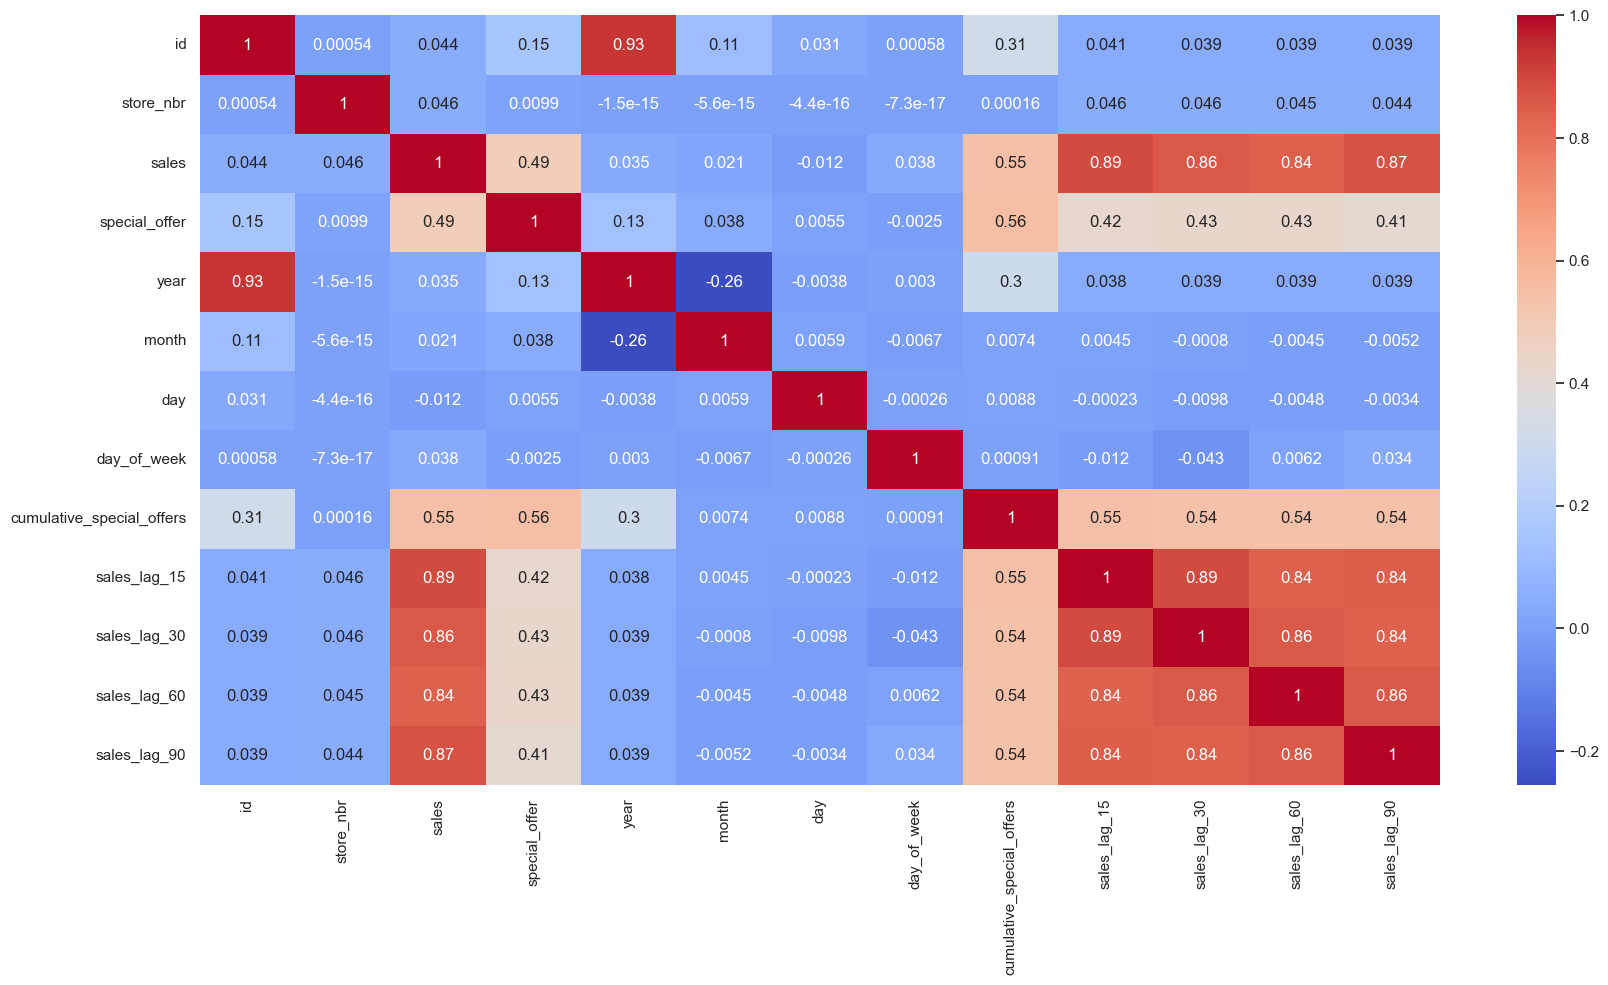

In [434]:
# Select only numeric columns
numeric_columns = training_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [460]:
start_date = pd.to_datetime('2017-07-31')
end_date = pd.to_datetime('2017-07-31')

In [461]:
data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  \
index_date                                                           
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
...              ...            ...   ...    ...  ...          ...   
2017-08-15   438.133              0  2017      8   15            2   
2017-08-15   154.553              1  2017      8   15            2   
2017-08-15  2419.729            148  2017      8   15            2   
2017-08-15   121.000              8  2017      8   15            2   
2017-08-15    16.000              0  2017      8   15            2   

            is_weekend  cumulative_special_offers  sales_lag_15  sales_lag_30  \
index_date                                                                      
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
...                ...                        ...           ...           ...   
2017-08-15           0                     226421       470.513       571.333   
2017-08-15           0                      37524        61.940       125.960   
2017-08-15           0                    1117921      1517.552      2041.967   
2017-08-15           0                      14565        56.000         0.000   
2017-08-15           0                      39052        12.000        18.334   

            sales_lag_60  sales_lag_90  
index_date                              
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
...                  ...           ...  
2017-08-15       470.789       394.846  
2017-08-15       122.255        87.339  
2017-08-15      1397.826      1391.712  
2017-08-15         2.000         3.000  
2017-08-15        18.344        14.505  

[3000888 rows x 16 columns]

In [437]:
X = training_data[['cumulative_special_offers','sales_lag_15','sales_lag_30','sales_lag_60','sales_lag_90']]
y = training_data['sales']

In [438]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [439]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1340064, 5)
(335016, 5)
(1340064,)
(335016,)


In [463]:
model = LinearRegression()

In [464]:
model.fit(X_train,y_train)

LinearRegression()

In [465]:
model.score(X_train,y_train)

0.8567615962625714

In [466]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [467]:
mse

258637.83982108263

In [468]:
mae

119.6540695948029

In [469]:
r2

0.8368178480520434

from sklearn.ensemble import RandomForestRegressor
# Train the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train,y_train)

model.score(X_train,y_train)

### Handle Nan

In [427]:
data= data.fillna('0')
data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  \
index_date                                                           
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
...              ...            ...   ...    ...  ...          ...   
2017-08-15   438.133              0  2017      8   15            2   
2017-08-15   154.553              1  2017      8   15            2   
2017-08-15  2419.729            148  2017      8   15            2   
2017-08-15   121.000              8  2017      8   15            2   
2017-08-15    16.000              0  2017      8   15            2   

            is_weekend  cumulative_special_offers sales_lag_15 sales_lag_30  \
index_date                                                                    
2013-01-01           0                          0            0            0   
2013-01-01           0                          0            0            0   
2013-01-01           0                          0            0            0   
2013-01-01           0                          0            0            0   
2013-01-01           0                          0            0            0   
...                ...                        ...          ...          ...   
2017-08-15           0                     226421      470.513      571.333   
2017-08-15           0                      37524        61.94       125.96   
2017-08-15           0                    1117921     1517.552     2041.967   
2017-08-15           0                      14565         56.0          0.0   
2017-08-15           0                      39052         12.0       18.334   

           sales_lag_60 sales_lag_90  
index_date                            
2013-01-01            0            0  
2013-01-01            0            0  
2013-01-01            0            0  
2013-01-01            0            0  
2013-01-01            0            0  
...                 ...          ...  
2017-08-15      470.789      394.846  
2017-08-15      122.255       87.339  
2017-08-15     1397.826     1391.712  
2017-08-15          2.0          3.0  
2017-08-15       18.344       14.505  

[3000888 rows x 16 columns]

In [429]:
corr = data.corr()
corr

id     store_nbr     sales  special_offer  \
id                         1.000000  3.013308e-04  0.085784       0.206260   
store_nbr                  0.000301  1.000000e+00  0.041196       0.007286   
sales                      0.085784  4.119605e-02  1.000000       0.427923   
special_offer              0.206260  7.285647e-03  0.427923       1.000000   
year                       0.977603  8.754910e-15  0.081093       0.199060   
month                      0.067434 -4.946280e-15  0.019790       0.025881   
day                        0.005915 -2.656089e-16 -0.011887       0.002208   
day_of_week               -0.001561  2.677324e-17  0.036869      -0.002696   
is_weekend                -0.000155  4.390413e-17  0.051874      -0.029590   
cumulative_special_offers  0.363342  1.222988e-04  0.470176       0.555436   

                                   year         month           day  \
id                         9.776028e-01  6.743357e-02  5.915116e-03   
store_nbr                  8.754910e-15 -4.946280e-15 -2.656089e-16   
sales                      8.109275e-02  1.978967e-02 -1.188702e-02   
special_offer              1.990601e-01  2.588107e-02  2.207588e-03   
year                       1.000000e+00 -1.432929e-01 -1.254521e-02   
month                     -1.432929e-01  1.000000e+00  2.622160e-03   
day                       -1.254521e-02  2.622160e-03  1.000000e+00   
day_of_week               -3.993864e-04 -5.607083e-03  1.827436e-03   
is_weekend                -2.262704e-05 -7.650410e-04  1.935278e-03   
cumulative_special_offers  3.616015e-01 -5.858476e-03 -1.088090e-03   

                            day_of_week    is_weekend  \
id                        -1.561462e-03 -1.554931e-04   
store_nbr                  2.677324e-17  4.390413e-17   
sales                      3.686897e-02  5.187378e-02   
special_offer             -2.696396e-03 -2.959044e-02   
year                      -3.993864e-04 -2.262704e-05   
month                     -5.607083e-03 -7.650410e-04   
day                        1.827436e-03  1.935278e-03   
day_of_week                1.000000e+00  7.907226e-01   
is_weekend                 7.907226e-01  1.000000e+00   
cumulative_special_offers -7.190629e-04 -2.921779e-04   

                           cumulative_special_offers  
id                                          0.363342  
store_nbr                                   0.000122  
sales                                       0.470176  
special_offer                               0.555436  
year                                        0.361601  
month                                      -0.005858  
day                                        -0.001088  
day_of_week                                -0.000719  
is_weekend                                 -0.000292  
cumulative_special_offers                   1.000000

## Unseen data subset 

In [344]:
unseen_data = data['2017-07-30':]
unseen_data

id       date  store_nbr                product_type  \
index_date                                                              
2017-07-30  2970594 2017-07-30          1                  AUTOMOTIVE   
2017-07-30  2970595 2017-07-30          1                   BABY CARE   
2017-07-30  2970596 2017-07-30          1                      BEAUTY   
2017-07-30  2970597 2017-07-30          1                   BEVERAGES   
2017-07-30  2970598 2017-07-30          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-08-15  3000883 2017-08-15          9                     POULTRY   
2017-08-15  3000884 2017-08-15          9              PREPARED FOODS   
2017-08-15  3000885 2017-08-15          9                     PRODUCE   
2017-08-15  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   
2017-08-15  3000887 2017-08-15          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  \
index_date                                                           
2017-07-30     1.000              0  2017      7   30            7   
2017-07-30     0.000              0  2017      7   30            7   
2017-07-30     2.000              0  2017      7   30            7   
2017-07-30  1212.000             16  2017      7   30            7   
2017-07-30     0.000              0  2017      7   30            7   
...              ...            ...   ...    ...  ...          ...   
2017-08-15   438.133              0  2017      8   15            2   
2017-08-15   154.553              1  2017      8   15            2   
2017-08-15  2419.729            148  2017      8   15            2   
2017-08-15   121.000              8  2017      8   15            2   
2017-08-15    16.000              0  2017      8   15            2   

            is_weekend  cumulative_special_offers sales_lag_15 sales_lag_30  \
index_date                                                                    
2017-07-30           1                       4772          6.0         11.0   
2017-07-30           1                         52          0.0          0.0   
2017-07-30           1                      12786          5.0          2.0   
2017-07-30           1                     888920       2183.0       2496.0   
2017-07-30           1                          0          0.0          0.0   
...                ...                        ...          ...          ...   
2017-08-15           0                     226421      470.513      571.333   
2017-08-15           0                      37524        61.94       125.96   
2017-08-15           0                    1117921     1517.552     2041.967   
2017-08-15           0                      14565         56.0          0.0   
2017-08-15           0                      39052         12.0       18.334   

           sales_lag_60 sales_lag_90  
index_date                            
2017-07-30          3.0          0.0  
2017-07-30          0.0          0.0  
2017-07-30         11.0          2.0  
2017-07-30       2554.0        825.0  
2017-07-30          1.0          0.0  
...                 ...          ...  
2017-08-15      470.789      394.846  
2017-08-15      122.255       87.339  
2017-08-15     1397.826     1391.712  
2017-08-15          2.0          3.0  
2017-08-15       18.344       14.505  

[30294 rows x 16 columns]

## Seen Data Subset

In [348]:
data = data[:'2017-07-30']
data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-07-30  2972371 2017-07-30          9                     POULTRY   
2017-07-30  2972372 2017-07-30          9              PREPARED FOODS   
2017-07-30  2972373 2017-07-30          9                     PRODUCE   
2017-07-30  2972374 2017-07-30          9  SCHOOL AND OFFICE SUPPLIES   
2017-07-30  2972375 2017-07-30          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  \
index_date                                                           
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
...              ...            ...   ...    ...  ...          ...   
2017-07-30   517.911              1  2017      7   30            7   
2017-07-30   145.490              1  2017      7   30            7   
2017-07-30  1882.588              7  2017      7   30            7   
2017-07-30    41.000              8  2017      7   30            7   
2017-07-30    19.909              0  2017      7   30            7   

            is_weekend  cumulative_special_offers sales_lag_15 sales_lag_30  \
index_date                                                                    
2013-01-01           0                          0            0            0   
2013-01-01           0                          0            0            0   
2013-01-01           0                          0            0            0   
2013-01-01           0                          0            0            0   
2013-01-01           0                          0            0            0   
...                ...                        ...          ...          ...   
2017-07-30           1                     223315       515.33      561.609   
2017-07-30           1                      37333      143.397      113.306   
2017-07-30           1                    1093128     1747.451     1522.438   
2017-07-30           1                      12580          2.0          0.0   
2017-07-30           1                      38682       35.845       22.438   

           sales_lag_60 sales_lag_90  
index_date                            
2013-01-01            0            0  
2013-01-01            0            0  
2013-01-01            0            0  
2013-01-01            0            0  
2013-01-01            0            0  
...                 ...          ...  
2017-07-30      377.428      615.898  
2017-07-30      168.022      175.991  
2017-07-30     1403.599     2502.085  
2017-07-30          2.0          1.0  
2017-07-30       16.851       54.162  

[2972376 rows x 16 columns]

### Correlation

In [ ]:
corr_final = data.corr()

# Get correlations with the target variable ('sales')
correlations_with_sales = corr_final['sales'].sort_values(ascending=False)

# Select top N features with high correlation
top_features = correlations_with_sales[:].index.tolist()
top_features

In [349]:
corr = data.corr()
corr

id     store_nbr     sales  special_offer  \
id                         1.000000  3.042213e-04  0.085895       0.206440   
store_nbr                  0.000304  1.000000e+00  0.040861       0.007272   
sales                      0.085895  4.086079e-02  1.000000       0.425920   
special_offer              0.206440  7.271867e-03  0.425920       1.000000   
year                       0.977053  8.768486e-15  0.081067       0.199008   
month                      0.059951 -4.962678e-15  0.019453       0.024774   
day                        0.017836 -2.821904e-16 -0.011267       0.004374   
day_of_week                0.000990  2.821906e-17  0.037268      -0.002346   
is_weekend                 0.001148  5.144036e-17  0.052270      -0.029375   
cumulative_special_offers  0.363170  1.246687e-04  0.468215       0.557490   

                                   year         month           day  \
id                         9.770533e-01  5.995143e-02  1.783550e-02   
store_nbr                  8.768486e-15 -4.962678e-15 -2.821904e-16   
sales                      8.106660e-02  1.945265e-02 -1.126701e-02   
special_offer              1.990082e-01  2.477382e-02  4.373573e-03   
year                       1.000000e+00 -1.532709e-01 -1.722633e-03   
month                     -1.532709e-01  1.000000e+00  6.546172e-03   
day                       -1.722633e-03  6.546172e-03  1.000000e+00   
day_of_week                2.020693e-03 -5.117285e-03  2.898900e-03   
is_weekend                 1.213567e-03 -4.782939e-04  1.680510e-03   
cumulative_special_offers  3.619180e-01 -1.176744e-02  6.707318e-03   

                            day_of_week    is_weekend  \
id                         9.904640e-04  1.147610e-03   
store_nbr                  2.821906e-17  5.144036e-17   
sales                      3.726829e-02  5.226971e-02   
special_offer             -2.346035e-03 -2.937531e-02   
year                       2.020693e-03  1.213567e-03   
month                     -5.117285e-03 -4.782939e-04   
day                        2.898900e-03  1.680510e-03   
day_of_week                1.000000e+00  7.907354e-01   
is_weekend                 7.907354e-01  1.000000e+00   
cumulative_special_offers  9.601363e-04  5.568043e-04   

                           cumulative_special_offers  
id                                          0.363170  
store_nbr                                   0.000125  
sales                                       0.468215  
special_offer                               0.557490  
year                                        0.361918  
month                                      -0.011767  
day                                         0.006707  
day_of_week                                 0.000960  
is_weekend                                  0.000557  
cumulative_special_offers                   1.000000

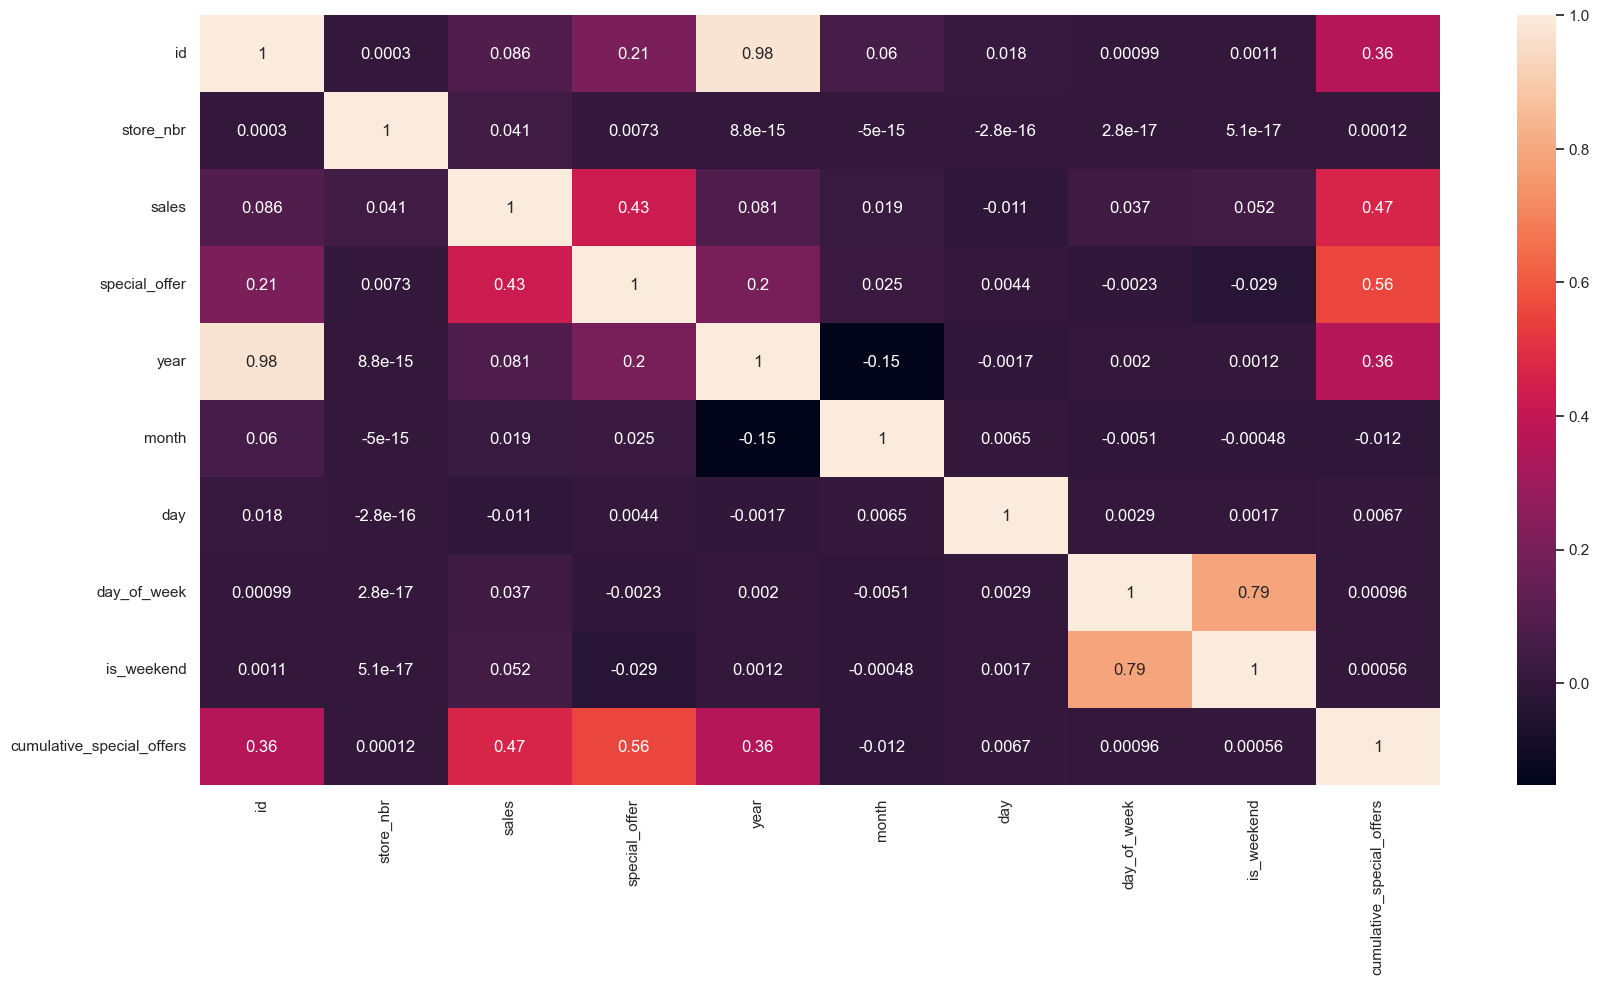

In [347]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Subset training data

In [542]:
data = data[:'2017-07-30']
data

id       date  store_nbr                product_type  \
index_date                                                              
2013-01-01        0 2013-01-01          1                  AUTOMOTIVE   
2013-01-01        1 2013-01-01          1                   BABY CARE   
2013-01-01        2 2013-01-01          1                      BEAUTY   
2013-01-01        3 2013-01-01          1                   BEVERAGES   
2013-01-01        4 2013-01-01          1                       BOOKS   
...             ...        ...        ...                         ...   
2017-07-30  2972371 2017-07-30          9                     POULTRY   
2017-07-30  2972372 2017-07-30          9              PREPARED FOODS   
2017-07-30  2972373 2017-07-30          9                     PRODUCE   
2017-07-30  2972374 2017-07-30          9  SCHOOL AND OFFICE SUPPLIES   
2017-07-30  2972375 2017-07-30          9                     SEAFOOD   

               sales  special_offer  year  month  day  day_of_week  \
index_date                                                           
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
2013-01-01     0.000              0  2013      1    1            2   
...              ...            ...   ...    ...  ...          ...   
2017-07-30   517.911              1  2017      7   30            7   
2017-07-30   145.490              1  2017      7   30            7   
2017-07-30  1882.588              7  2017      7   30            7   
2017-07-30    41.000              8  2017      7   30            7   
2017-07-30    19.909              0  2017      7   30            7   

            is_weekend  cumulative_special_offers  sales_lag_15  sales_lag_30  \
index_date                                                                      
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
2013-01-01           0                          0           NaN           NaN   
...                ...                        ...           ...           ...   
2017-07-30           1                     223315       515.330       561.609   
2017-07-30           1                      37333       143.397       113.306   
2017-07-30           1                    1093128      1747.451      1522.438   
2017-07-30           1                      12580         2.000         0.000   
2017-07-30           1                      38682        35.845        22.438   

            sales_lag_60  sales_lag_90  
index_date                              
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
...                  ...           ...  
2017-07-30       377.428       615.898  
2017-07-30       168.022       175.991  
2017-07-30      1403.599      2502.085  
2017-07-30         2.000         1.000  
2017-07-30        16.851        54.162  

[2972376 rows x 16 columns]

### Separate features and target variable


In [543]:
X = data.drop(['sales'], axis=1)
y = data['sales']

# Apply log transformation to the target variable
y = np.log1p(y)
y

index_date
2013-01-01    0.000000
2013-01-01    0.000000
2013-01-01    0.000000
2013-01-01    0.000000
2013-01-01    0.000000
                ...   
2017-07-30    6.251732
2017-07-30    4.986957
2017-07-30    7.540934
2017-07-30    3.737670
2017-07-30    3.040180
Name: sales, Length: 2972376, dtype: float64

In [544]:
X = data[['cumulative_special_offers','sales_lag_15','sales_lag_30','sales_lag_60','sales_lag_90']]
X


cumulative_special_offers  sales_lag_15  sales_lag_30  \
index_date                                                          
2013-01-01                          0           NaN           NaN   
2013-01-01                          0           NaN           NaN   
2013-01-01                          0           NaN           NaN   
2013-01-01                          0           NaN           NaN   
2013-01-01                          0           NaN           NaN   
...                               ...           ...           ...   
2017-07-30                     223315       515.330       561.609   
2017-07-30                      37333       143.397       113.306   
2017-07-30                    1093128      1747.451      1522.438   
2017-07-30                      12580         2.000         0.000   
2017-07-30                      38682        35.845        22.438   

            sales_lag_60  sales_lag_90  
index_date                              
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
...                  ...           ...  
2017-07-30       377.428       615.898  
2017-07-30       168.022       175.991  
2017-07-30      1403.599      2502.085  
2017-07-30         2.000         1.000  
2017-07-30        16.851        54.162  

[2972376 rows x 5 columns]

In [545]:
X = np.log1p(X)
X

cumulative_special_offers  sales_lag_15  sales_lag_30  \
index_date                                                          
2013-01-01                   0.000000           NaN           NaN   
2013-01-01                   0.000000           NaN           NaN   
2013-01-01                   0.000000           NaN           NaN   
2013-01-01                   0.000000           NaN           NaN   
2013-01-01                   0.000000           NaN           NaN   
...                               ...           ...           ...   
2017-07-30                  12.316343      6.246746      6.332585   
2017-07-30                  10.527660      4.972566      4.738879   
2017-07-30                  13.904555      7.466486      7.328725   
2017-07-30                   9.439943      1.098612      0.000000   
2017-07-30                  10.563156      3.606720      3.154359   

            sales_lag_60  sales_lag_90  
index_date                              
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
2013-01-01           NaN           NaN  
...                  ...           ...  
2017-07-30      5.936026      6.424704  
2017-07-30      5.130029      5.176099  
2017-07-30      7.247507      7.825279  
2017-07-30      1.098612      0.693147  
2017-07-30      2.882060      4.010274  

[2972376 rows x 5 columns]

In [546]:
X=X.fillna(0)
X

cumulative_special_offers  sales_lag_15  sales_lag_30  \
index_date                                                          
2013-01-01                   0.000000      0.000000      0.000000   
2013-01-01                   0.000000      0.000000      0.000000   
2013-01-01                   0.000000      0.000000      0.000000   
2013-01-01                   0.000000      0.000000      0.000000   
2013-01-01                   0.000000      0.000000      0.000000   
...                               ...           ...           ...   
2017-07-30                  12.316343      6.246746      6.332585   
2017-07-30                  10.527660      4.972566      4.738879   
2017-07-30                  13.904555      7.466486      7.328725   
2017-07-30                   9.439943      1.098612      0.000000   
2017-07-30                  10.563156      3.606720      3.154359   

            sales_lag_60  sales_lag_90  
index_date                              
2013-01-01      0.000000      0.000000  
2013-01-01      0.000000      0.000000  
2013-01-01      0.000000      0.000000  
2013-01-01      0.000000      0.000000  
2013-01-01      0.000000      0.000000  
...                  ...           ...  
2017-07-30      5.936026      6.424704  
2017-07-30      5.130029      5.176099  
2017-07-30      7.247507      7.825279  
2017-07-30      1.098612      0.693147  
2017-07-30      2.882060      4.010274  

[2972376 rows x 5 columns]

### Split the data into training and testing sets


In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define categorical and numerical features

In [548]:
#categorical_features = ['product_type'] #, 'store_nbr', 'year', 'month', 'day_of_week' - already encoded
numerical_features = ['cumulative_special_offers','sales', 'sales_lag_15', 'sales_lag_30', 'sales_lag_60', 'sales_lag_90']

In [550]:
lr_model = LinearRegression()

In [552]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [555]:
lr_model.score(X_train,y_train)

0.8957577863795434

In [557]:
lr_model.score(X_test,y_test)

0.897801958622539

In [558]:
y_pred_lr = lr_model.predict(X_test)

In [561]:
mse = mean_squared_error(y_test,y_pred_lr)
mse

0.7421157825088157

In [564]:
r2_score_lr = r2_score(y_test,y_pred_lr)
r2_score_lr

0.897801958622539

In [566]:
mae = mean_absolute_error(y_test,y_pred_lr)
mae

0.4789862002304901

### Transformers 

In [510]:
from sklearn.preprocessing import FunctionTransformer

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
    ('scaler', StandardScaler())])

#categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore')])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features)])
 # ('cat', categorical_transformer, categorical_features) 

### Linear Regression Model

In [513]:
linear_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', LinearRegression())])
linear_reg_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cumulative_special_offers',
                                                   'sales', 'sales_lag_15',
                                                   'sales_lag_30',
                                                   'sales_lag_60',
                                                   'sales_lag_90'])])),
                ('regressor', LinearRegression())])

In [514]:
linear_reg_model.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

### MLPRegressor Model

In [495]:
mlp_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', MLPRegressor(random_state=42))])

In [497]:
X_train

cumulative_special_offers  sales_lag_15  sales_lag_30  \
index_date                                                          
2016-03-08                     158065      2681.000      2468.000   
2016-11-18                     743099      1904.857      3368.343   
2016-03-18                         14        10.000         9.000   
2015-04-08                      11360        36.657        28.000   
2016-06-04                      19154       133.855        77.060   
...                               ...           ...           ...   
2017-03-14                         37         1.000         1.000   
2017-05-05                      11264         0.000         4.000   
2015-08-18                        760         2.000         1.000   
2016-09-27                        995        10.000        34.000   
2016-02-23                      66368      1989.000      2232.000   

            sales_lag_60  sales_lag_90  
index_date                              
2016-03-08   2497.000000      3322.000  
2016-11-18   2310.769000      2832.646  
2016-03-18      5.000000         8.000  
2015-04-08     64.000000        38.835  
2016-06-04     67.423004       195.151  
...                  ...           ...  
2017-03-14      0.000000         0.000  
2017-05-05      0.000000         2.000  
2015-08-18      8.000000         0.000  
2016-09-27     10.000000        13.000  
2016-02-23   1863.000000      1473.000  

[1340064 rows x 5 columns]

In [498]:
y_train

index_date
2016-03-08    2430.000
2016-11-18    2387.226
2016-03-18      12.000
2015-04-08      36.000
2016-06-04     165.480
                ...   
2017-03-14       0.000
2017-05-05       2.000
2015-08-18       4.000
2016-09-27      15.000
2016-02-23    1316.000
Name: sales, Length: 1340064, dtype: float64

## Training and Testing Scores

In [512]:
models = [linear_reg_model]
model_names = ['Linear Regression']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Results for {name}:")
    print("Training Scores:")
    print(f"  MSE: {train_mse}")
    print(f"  MAE: {train_mae}")
    print(f"  R-squared: {train_r2}")
    
    print("\nTesting Scores:")
    print(f"  MSE: {test_mse}")
    print(f"  MAE: {test_mae}")
    print(f"  R-squared: {test_r2}")
    
    print("\n")

ValueError: A given column is not a column of the dataframe

## Prediction and Evaluation on Unseen Data

In [400]:
for model, name in zip(models, model_names):
    # Assuming 'unseen_data' is your DataFrame with the same structure as the training data
    X_unseen = unseen_data.drop(['sales'], axis=1)
    y_unseen = unseen_data['sales']

    # Preprocess unseen data
    X_unseen_preprocessed = preprocessor.transform(X_unseen)

    # Make predictions on unseen data
    y_unseen_pred = model.predict(X_unseen_preprocessed)

    # Evaluate the performance on unseen data
    mse_unseen = mean_squared_error(y_unseen, y_unseen_pred)
    mae_unseen = mean_absolute_error(y_unseen, y_unseen_pred)
    r2_unseen = r2_score(y_unseen, y_unseen_pred)

    print(f"Results for {name} on Unseen Data:")
    print(f"MSE: {mse_unseen}")
    print(f"MAE: {mae_unseen}")
    print(f"R-squared: {r2_unseen}")
    print("\n")

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

## Apply Robust transformation

In [ ]:
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is your DataFrame
features_to_scale = ['sales', 'cumulative_special_offers', 'sales_lag_15', 'sales_lag_30', 'sales_lag_60', 'sales_lag_90']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the selected features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Check the scaled data
print(data.head())


### Split into training data

In [ ]:
# Filter data for training (considering only data from 2016)
training_data = data[(data['date'] >= '2015-01-01') & (data['date'] <= '2017-7-30')]
training_data

## ML Models

In [ ]:
# Split data into features (X) and target variable (y)
X = data_encoded.drop(['sales', 'date'], axis=1)  # Adjust features as needed
y = data_encoded['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')